In [ ]:
! pip install pyhht

In [ ]:
# Mengakses lokasi penyimpanan berkas pada Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from pyhht.emd import EMD
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
def plot_imfs(signal, imfs, time_samples=None, fignum=None):
    if time_samples is None:
        time_samples = np.arange(signal.shape[0])

    n_imfs = imfs.shape[0]

    plt.figure(num=fignum, figsize=(16, 25))
    axis_extent = max(np.max(np.abs(imfs[:-1, :]), axis=0))

    # Plot original signal
    ax = plt.subplot(n_imfs + 1, 1, 1)
    ax.plot(time_samples, signal)
    ax.axis([time_samples[0], time_samples[-1], signal.min(), signal.max()])
    ax.tick_params(which='both')
    ax.grid(True)
    ax.set_ylabel('Signal')
    ax.set_title('Empirical Mode Decomposition')

    # Plot the IMFs
    for i in range(n_imfs - 1):
        print(i + 2)
        ax = plt.subplot(n_imfs + 1, 1, i + 2)
        ax.plot(time_samples, imfs[i, :])
        ax.axis([time_samples[0], time_samples[-1], -axis_extent, axis_extent])
        ax.tick_params(which='both')
        ax.grid(True)
        ax.set_ylabel('imf' + str(i + 1))
    
    plt.show()
    plt.close()

    plt.figure(figsize=(16, 5))
    plt.plot(time_samples, imfs[-1, :], 'r')
    
    plt.axis('tight')
    plt.tick_params(which='both')
    plt.grid(True)
    plt.ylabel('res.')

    line = plt.gca().lines[0]
    xdata = line.get_xdata()
    ydata = line.get_ydata()
    plt.show()

    data_res = pd.DataFrame(index=None)
    data_res["X"] = xdata
    data_res["Y"] = ydata.astype("int64")
    data_res["SIGNAL"] = signal.astype("int64")
    print(data_res)
    data_res.to_csv("data_res.txt", index=None)

In [ ]:
# Menampilkan struktur tabel (baris, kolom, dan tipe data) pada file data
data = pd.read_csv("/content/drive/MyDrive/.../new_data.csv", engine="python")[12:]
new_data = data.copy()
new_data["BULAN"] = new_data["BULAN"].astype("datetime64")
new_data = new_data.set_index("BULAN")
bps, trends = new_data.BPS, new_data.TRENDS
new_data.drop(columns=["BPS", "TRENDS", "Unnamed: 0", "DELAY0"], inplace=True)
new_data = new_data.astype("int64")
print(new_data.dtypes)
new_data


DELAY1     int64
DELAY2     int64
DELAY3     int64
DELAY4     int64
DELAY5     int64
DELAY6     int64
DELAY7     int64
DELAY8     int64
DELAY9     int64
DELAY10    int64
DELAY11    int64
DELAY12    int64
dtype: object


,DELAY1,DELAY2,DELAY3,DELAY4,DELAY5,DELAY6,DELAY7,DELAY8,DELAY9,DELAY10,DELAY11,DELAY12
BULAN,,,,,,,,,,,,
2009-01-01,305767,266175,299943,274428,317583,314608,314608,396508,274428,576583,219303,291312
2009-02-01,329623,305767,266175,299943,274428,317583,314608,314608,396508,274428,576583,219303
2009-03-01,302848,329623,305767,266175,299943,274428,317583,314608,314608,396508,274428,576583
2009-04-01,458752,302848,329623,305767,266175,299943,274428,317583,314608,314608,396508,274428
2009-05-01,776223,458752,302848,329623,305767,266175,299943,274428,317583,314608,314608,396508
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,297052,533232,305767,444528,548800,655452,386575,448063,427063,434007,568575,473200
2021-09-01,416752,297052,533232,305767,444528,548800,655452,386575,448063,427063,434007,568575
2021-10-01,544887,416752,297052,533232,305767,444528,548800,655452,386575,448063,427063,434007


# Pembersihan Noise Menggunakan HHT

[ 291312  219303  576583  274428  396508  314608  314608  317583  274428
  299943  266175  305767  329623  302848  458752  776223  681408  592767
  694575  560623  651175  857500  592767  338800  979132  776223  813967
  685783 1228927  540988  506527  707868  529375  576583  406567  862407
  887151  703423  462343  646912  794983  617463 1097712  469567  852606
  887151  707868  685783 1005487  664048  799708  638428  799708  804447
  818747  672700  651175  809200  725788  540988  560623  721287  790272
  690172 1228927 1037575  847728  877212  907200  813967  762300  917308
  818747 1270332 1092175 1103263  927472  892143  872263 1404928  994903
  725788 1312423 1053808 1461943 1037575 1016127 1064700 1182447 1070167
  804447 1223068  867328  942823  963487 1053808 1276303 1081143 1392412
 1108828 1240687  989632 1010800 1153852 1005487 1165248  882175 1417500
 1306368 1205575 1205575 1442812 1639792 1258432 1417500 1820700 1633023
 1361367 1936732 1097712 1792252 1673847 1468348 13

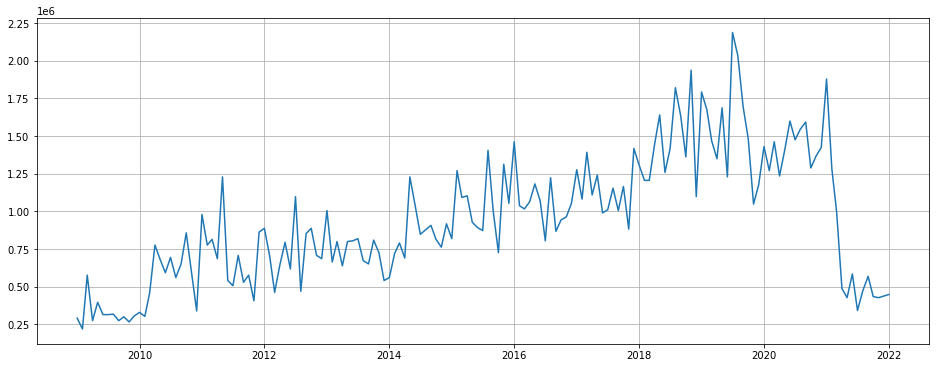

In [ ]:
# Membuat dataset menjadi grafik
line1 = np.array(data["BULAN"].astype("datetime64"))
modes = np.array(new_data["DELAY12"])
print(modes)
plt.figure(figsize=(16, 6))
plt.plot_date(line1, modes, "-")
plt.grid()
plt.show()

2
3
4
5


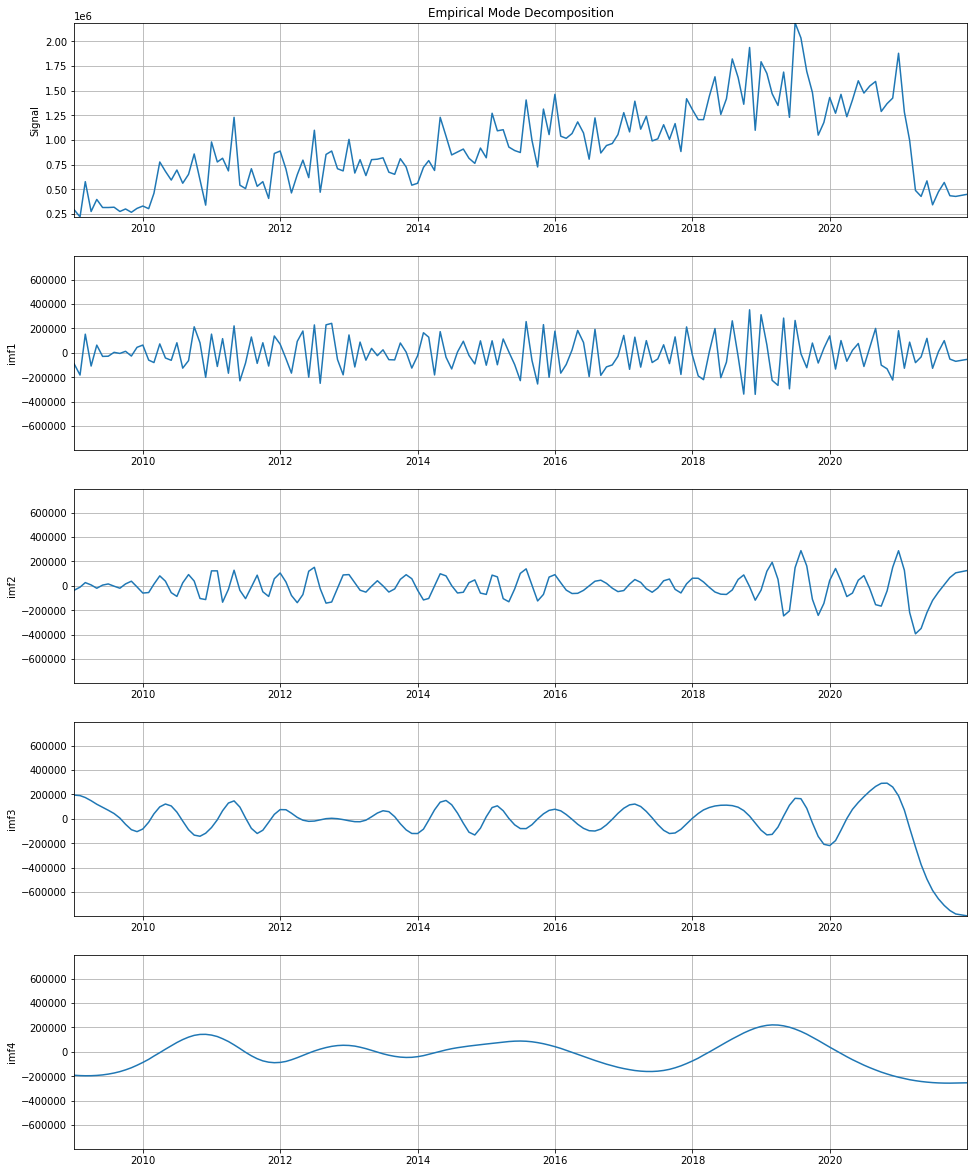

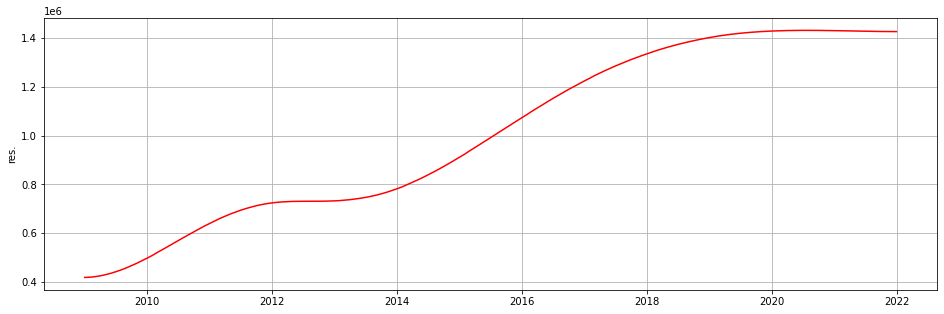

             X        Y  SIGNAL
0   2009-01-01   417831  291312
1   2009-02-01   418780  219303
2   2009-03-01   420960  576583
3   2009-04-01   424360  274428
4   2009-05-01   428912  396508
..         ...      ...     ...
151 2021-08-01  1428295  473200
152 2021-09-01  1427942  568575
153 2021-10-01  1427639  434007
154 2021-11-01  1427394  427063
155 2021-12-31  1427203  448063

[156 rows x 3 columns]


In [ ]:
# Pemprosesan Noise dan Hasil Pembersihan
decompos = EMD(modes)
imfs = decompos.decompose()
plot_imf = plot_imfs(modes, imfs, line1)

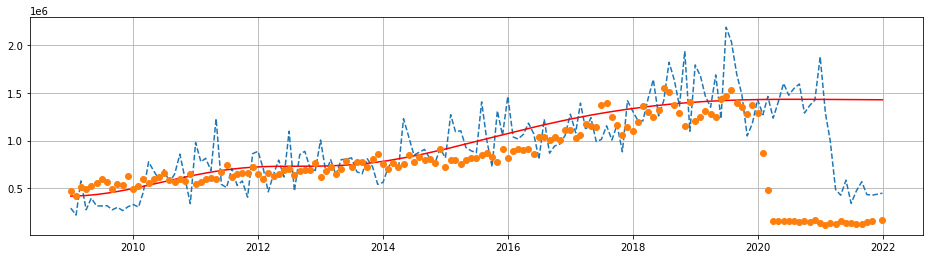

In [ ]:
# Gabungan dataset bps, google trends, dan hht
# GOOGLE TREND Warna Biru
# BPS Warna Oren
# HHT WArna Merah
data_res = pd.read_csv("data_res.txt").set_index(line1)
hht_res = data_res["Y"]
real_signal = data_res["SIGNAL"]
plt.figure(figsize=(16, 4))
plt.plot(real_signal, '--')
plt.plot(hht_res, 'r')
plt.plot(bps, 'o')

plt.grid()
plt.show()

In [ ]:
hht_res_big = []
for line in hht_res:
    hht_res_big.append(int(line))

compare = pd.DataFrame([hht_res_big, bps], ["hht", "bps"]).transpose()
compare

,hht,bps
0,417831,473165
1,418780,421555
2,420960,511314
3,424360,487121
4,428912,521735
...,...,...
151,1428295,124751
152,1427942,124071
153,1427639,148645
154,1427394,153199


# Proses Pengujian Atau Prediksi LSTM

In [ ]:
# Selanjutnya Proses Prediski
# Menampilkan struktur tabel (hht, bps, dan bulan)
dataset = compare
bulan = pd.read_csv("/content/drive/MyDrive/.../new_data.csv", engine="python")[12:].reset_index()
dataset["BULAN"] = bulan["BULAN"].str.replace("-", "")
dataset["BULAN"] = dataset["BULAN"].str[:6]
dataset["REAL"] = modes
dataset

,hht,bps,BULAN,REAL
0,417831,473165,200901,291312
1,418780,421555,200902,219303
2,420960,511314,200903,576583
3,424360,487121,200904,274428
4,428912,521735,200905,396508
...,...,...,...,...
151,1428295,124751,202108,473200
152,1427942,124071,202109,568575
153,1427639,148645,202110,434007
154,1427394,153199,202111,427063


In [ ]:
# Memanggil data Tahun 2021
sample = dataset.drop(columns=["bps","REAL"]).astype("int32")
sample1 = dataset.drop(columns=["bps","hht"]).astype("int32")
value = dataset["bps"].astype("int32")
sample_train = np.array(sample[:144]).reshape(len(sample[:144]), 2)
sample_train1 = np.array(sample1[:144]).reshape(len(sample1[:144]), 2)
value_train = np.array(value[:144])
sample_test = np.array(sample[144:]).reshape(len(sample[144:]), 2)
sample_test1 = np.array(sample1[144:]).reshape(len(sample1[144:]), 2)
value_test = np.array(value[144:])
print(sample_test)
print(value_test)

[[1431217  202101]
 [1430830  202102]
 [1430414  202103]
 [1429981  202104]
 [1429541  202105]
 [1429105  202106]
 [1428686  202107]
 [1428295  202108]
 [1427942  202109]
 [1427639  202110]
 [1427394  202111]
 [1427203  202112]]
[137230 115765 130933 125001 152604 137247 135438 124751 124071 148645
 153199 163619]


In [ ]:
# Membangun arsitektur LSTM Forecasting yang belum di HHT ( TREND )
lstm1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max(sample["hht"]+1), output_dim=100, trainable=False, input_length=2),
    tf.keras.layers.LSTM(100, time_major=True, return_sequences=True, activation="exponential"),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="exponential")
], name="LSTM1")

lstm1.compile(optimizer="RMSprop", loss="mean_absolute_percentage_error", metrics=["mean_absolute_percentage_error"])
lstm1.summary()

Model: "LSTM1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2, 100)            143232300 
                                                                 
 lstm (LSTM)                 (None, 2, 100)            80400     
                                                                 
 dense (Dense)               (None, 2, 1)              101       
                                                                 
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 143,312,804
Trainable params: 80,504
Non-trainable params: 143,232,300
_________________________________________________________________


In [ ]:
#Proses pelatihan LSTM Forecasting untuk data latih sekaligus melakukan validasi terhadap data uji yang belum di HHT ( TREND )
lstm1.fit(sample_train1, value_train, batch_size=1, epochs=100, verbose=1, shuffle=False, use_multiprocessing=True)

Epoch 1/100
144/144 [==============================] - 8s 9ms/step - loss: 31.7044 - mean_absolute_percentage_error: 31.7044
Epoch 2/100
144/144 [==============================] - 1s 9ms/step - loss: 22.6081 - mean_absolute_percentage_error: 22.6081
Epoch 3/100
144/144 [==============================] - 1s 9ms/step - loss: 24.1283 - mean_absolute_percentage_error: 24.1283
Epoch 4/100
144/144 [==============================] - 1s 9ms/step - loss: 22.9729 - mean_absolute_percentage_error: 22.9729
Epoch 5/100
144/144 [==============================] - 1s 9ms/step - loss: 23.9585 - mean_absolute_percentage_error: 23.9585
Epoch 6/100
144/144 [==============================] - 1s 9ms/step - loss: 23.4998 - mean_absolute_percentage_error: 23.4998
Epoch 7/100
144/144 [==============================] - 1s 10ms/step - loss: 21.4461 - mean_absolute_percentage_error: 21.4461
Epoch 8/100
144/144 [==============================] - 1s 10ms/step - loss: 22.0305 - mean_absolute_percentage_error: 22.030

In [ ]:
# Membangun arsitektur LSTM Forecasting yang di HHT
lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max(sample["hht"]+1), output_dim=100, trainable=False, input_length=2),
    tf.keras.layers.LSTM(100, time_major=True, return_sequences=True, activation="exponential"),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="exponential")
], name="LSTM")

lstm.compile(optimizer="RMSprop", loss="mean_absolute_percentage_error", metrics=["mean_absolute_percentage_error"])
lstm.summary()

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2, 100)            143232300 
                                                                 
 lstm_1 (LSTM)               (None, 2, 100)            80400     
                                                                 
 dense_2 (Dense)             (None, 2, 1)              101       
                                                                 
 flatten_1 (Flatten)         (None, 2)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 143,312,804
Trainable params: 80,504
Non-trainable params: 143,232,300
_________________________________________________________________


In [ ]:
#Proses pelatihan LSTM Forecasting untuk data latih sekaligus melakukan validasi terhadap data uji yang di HHT
lstm.fit(sample_train, value_train, batch_size=1, epochs=100, verbose=1, shuffle=False, use_multiprocessing=True)

Epoch 1/100
144/144 [==============================] - 2s 6ms/step - loss: 43.2028 - mean_absolute_percentage_error: 43.2028
Epoch 2/100
144/144 [==============================] - 1s 6ms/step - loss: 22.2561 - mean_absolute_percentage_error: 22.2561
Epoch 3/100
144/144 [==============================] - 1s 6ms/step - loss: 25.7547 - mean_absolute_percentage_error: 25.7547
Epoch 4/100
144/144 [==============================] - 1s 6ms/step - loss: 25.9737 - mean_absolute_percentage_error: 25.9737
Epoch 5/100
144/144 [==============================] - 1s 5ms/step - loss: 25.5887 - mean_absolute_percentage_error: 25.5887
Epoch 6/100
144/144 [==============================] - 1s 5ms/step - loss: 21.1512 - mean_absolute_percentage_error: 21.1512
Epoch 7/100
144/144 [==============================] - 1s 5ms/step - loss: 24.2662 - mean_absolute_percentage_error: 24.2662
Epoch 8/100
144/144 [==============================] - 1s 6ms/step - loss: 22.9300 - mean_absolute_percentage_error: 22.9300


In [ ]:
# Memprediksi tahun 2021 kemudian menampilkannya yang belum di HHT( TREND )
test_predict1 = lstm1.predict(sample_test1, batch_size=1, use_multiprocessing=True)
predict1 = []
for i in test_predict1:
    predict1.append(i)

predict1

[array([296065.56], dtype=float32),
 array([335780.72], dtype=float32),
 array([215755.97], dtype=float32),
 array([142610.06], dtype=float32),
 array([137468.23], dtype=float32),
 array([219536.66], dtype=float32),
 array([242268.38], dtype=float32),
 array([115993.48], dtype=float32),
 array([125600.664], dtype=float32),
 array([126954.016], dtype=float32),
 array([114517.875], dtype=float32),
 array([159299.2], dtype=float32)]

In [ ]:
# Memprediksi tahun 2021 kemudian menampilkannya yang di HHT
test_predict = lstm.predict(sample_test, batch_size=1, use_multiprocessing=True)
predict = []
for i in test_predict:
    predict.append(i)

predict

[array([191530.38], dtype=float32),
 array([154833.5], dtype=float32),
 array([223000.64], dtype=float32),
 array([263365.34], dtype=float32),
 array([186840.94], dtype=float32),
 array([626128.], dtype=float32),
 array([396613.84], dtype=float32),
 array([303257.72], dtype=float32),
 array([274782.72], dtype=float32),
 array([240446.1], dtype=float32),
 array([141177.58], dtype=float32),
 array([415975.3], dtype=float32)]

In [ ]:
compare = pd.DataFrame([value_test, predict, predict1], ["ACTUAL", "PREDICT HHT", "PREDICT TRENDS"]).transpose().set_index(line1[-12:])
compare

,ACTUAL,PREDICT HHT,PREDICT TRENDS
2021-01-01,137230,[191530.38],[296065.56]
2021-02-01,115765,[154833.5],[335780.72]
2021-03-01,130933,[223000.64],[215755.97]
2021-04-01,125001,[263365.34],[142610.06]
2021-05-01,152604,[186840.94],[137468.23]
2021-06-01,137247,[626128.0],[219536.66]
2021-07-01,135438,[396613.84],[242268.38]
2021-08-01,124751,[303257.72],[115993.48]
2021-09-01,124071,[274782.72],[125600.664]
2021-10-01,148645,[240446.1],[126954.016]


In [ ]:
# # Aktual Warna Biru 
# # Hasil TRENDS Warna Hijau
# # Hasil Prediksi HHT Warna Merah
# plt.figure(figsize=(16, 6))
# plt.plot(compare)
# plt.grid()
# plt.show()

In [ ]:
# Hasil RMSE dan MAPE ditahun 2021
mape = []
mape1 = []
rmse = []
rmse1 = []
for i in range(len(sample_test)):
    mape.append((abs((value_test[i] - predict[i]) / value_test[i]) * 100).tolist())
    rmse.append(np.sqrt((value_test[i] - predict[i])**2).tolist())

    mape1.append((abs((value_test[i] - predict1[i]) / value_test[i]) * 100).tolist())
    rmse1.append(np.sqrt((value_test[i] - predict1[i])**2).tolist())

mape1 = [j for sub in mape1 for j in sub]
rmse1 = [j for sub in rmse1 for j in sub]
eval = pd.DataFrame()
eval["MAPE TREND"] = mape1
eval["RMSE TREND"] = rmse1

mape = [j for sub in mape for j in sub]
rmse = [j for sub in rmse for j in sub]
eval["MAPE HHT"] = mape
eval["RMSE HHT"] = rmse

eval

,MAPE TREND,RMSE TREND,MAPE HHT,RMSE HHT
0,115.744052,158835.562500,39.568881,54300.375000
1,190.053746,220015.718750,33.748110,39068.500000
2,64.783491,84822.968750,70.316605,92067.640625
3,14.087137,17609.062500,110.690589,138364.343750
4,9.918328,15135.765625,22.435151,34236.937500
5,59.957344,82289.656250,356.205236,488881.000000
6,78.877697,106830.375000,192.837936,261175.843750
7,7.020003,8757.523438,143.090411,178506.718750
8,1.232894,1529.664062,121.472156,150711.718750
9,14.592475,21690.984375,61.758615,91801.093750


In [ ]:
mapea1=np.average(eval['MAPE TREND'])
rmsea1 = np.average(eval['RMSE TREND'])
print("MAPE TREND: ", mapea1)
print("RMSE TREND: ", rmsea1)

mapea=np.average(eval['MAPE HHT'])
rmsea = np.average(eval['RMSE HHT'])
print("MAPE HHT: ", mapea)
print("RMSE HHT: ", rmsea)

MAPE TREND:  48.679688686475
RMSE TREND:  63376.516927083336
MAPE HHT:  109.51706130290886
RMSE HHT:  149457.65885416666
